In [1]:
import numpy as np
from astropy import units as U
from astropy import constants as Const
# -- FOMOspec -- 
from FOMOspec import util as UT

from feasibgs import forwardmodel

In [15]:
import matplotlib  as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

### lets read in EAGLE data

In [3]:
feagle = ''.join([UT.dat_dir(), 'spectra/eagle/EAGLE_Fullspectra_Nebular_onlyAGBdust_00000.txt']) 
spec = np.loadtxt(feagle)

In [4]:
spec *= U.Lsun / U.Hz

In [5]:
lam = np.loadtxt(''.join([UT.dat_dir(), 'spectra/eagle/FSPS_wave_Full.txt']))

In [6]:
lam *= U.Angstrom

flux in units of $L_\odot / Hz$ which need to be converted to $ergs/s/cm^2/A$

In [7]:
c_light = Const.c
H0 = 70 * U.km / U.s / U.Mpc
zdist = 0.035 # median value of NSA

In [8]:
spec *= 1./(4.*np.pi * (zdist * c_light/H0).to(U.cm)**2) / lam**2 * c_light

In [9]:
spec.to(U.erg / U.s / U.cm**2 / U.Angstrom)

<Quantity [[2.17024522e-19, 2.22240508e-19, 2.56452937e-19, ...,
            2.50200183e-30, 2.41127948e-30, 2.32354670e-30],
           [2.11940248e-19, 2.16473277e-19, 2.49414639e-19, ...,
            2.51355168e-30, 2.42239584e-30, 2.33421822e-30],
           [1.88447787e-19, 1.91355219e-19, 2.20116060e-19, ...,
            1.93998253e-30, 1.86962714e-30, 1.80149780e-30],
           ...,
           [4.96549268e-21, 4.95148061e-21, 5.64490457e-21, ...,
            1.61890354e-32, 1.56014099e-32, 1.50344605e-32],
           [2.63434504e-19, 2.67810674e-19, 3.17719701e-19, ...,
            4.89314109e-29, 4.80830385e-29, 4.72478616e-29],
           [1.75550271e-19, 1.75893952e-19, 2.11949475e-19, ...,
            2.79071301e-29, 2.74379948e-29, 2.69758419e-29]] erg / (Angstrom cm2 s)>

37
235
908


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.


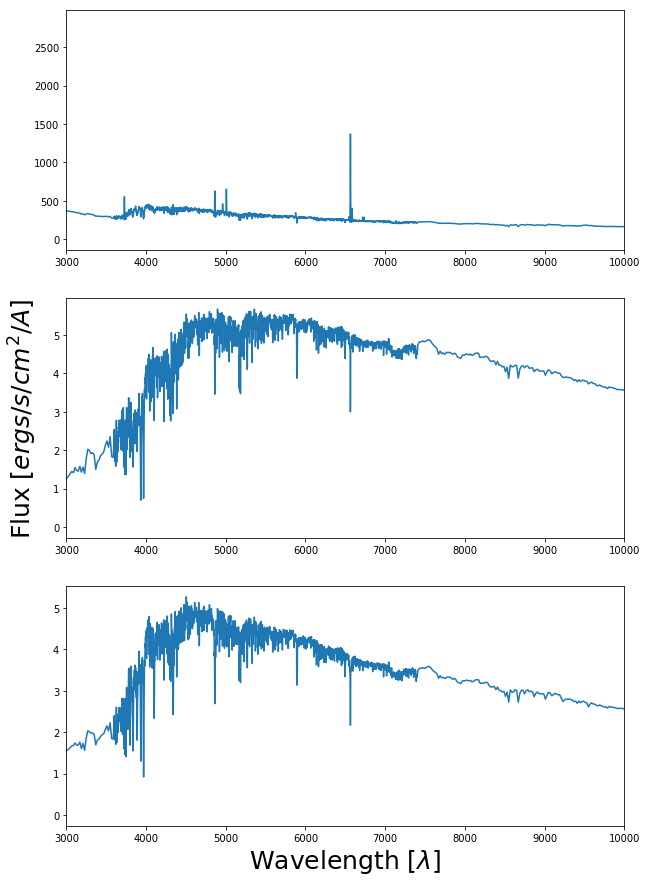

In [10]:
fig = plt.figure(figsize=(10,5*3))
bkgd = fig.add_subplot(111, frameon=False)
np.random.seed(1)
for ii, i in enumerate(np.random.choice(np.arange(spec.shape[0]), 3)):
    print(i)
    sub = fig.add_subplot(3,1,ii+1)
    sub.plot(lam, 1e17*spec.to(U.erg / U.s / U.cm**2 / U.Angstrom)[i,:])
    
    sub.set_xlim([3000., 10000.])
bkgd.set_xlabel('Wavelength [$\lambda$]', fontsize=25)
bkgd.set_ylabel("Flux [$ergs/s/cm^2/A$]", fontsize=25)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

37
235
908


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.


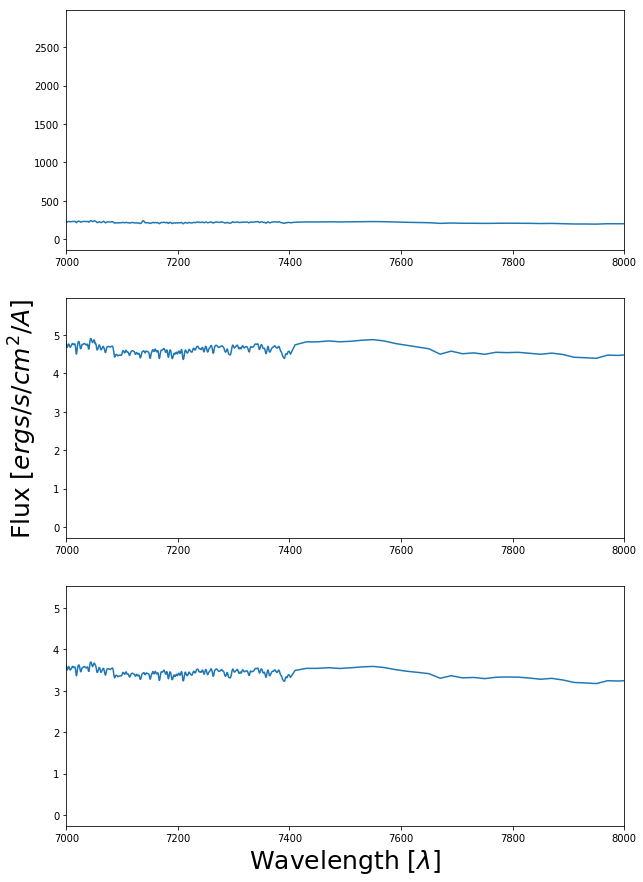

In [11]:
fig = plt.figure(figsize=(10,5*3))
bkgd = fig.add_subplot(111, frameon=False)
np.random.seed(1)
for ii, i in enumerate(np.random.choice(np.arange(spec.shape[0]), 3)):
    print(i)
    sub = fig.add_subplot(3,1,ii+1)
    sub.plot(lam, 1e17*spec.to(U.erg / U.s / U.cm**2 / U.Angstrom)[i,:])
    
    sub.set_xlim([7000., 8000.])
bkgd.set_xlabel('Wavelength [$\lambda$]', fontsize=25)
bkgd.set_ylabel("Flux [$ergs/s/cm^2/A$]", fontsize=25)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

In [12]:
wave_fm = 3000. + 0.1 * np.arange(100000)

In [13]:
fakedesi = forwardmodel.fakeDESIspec()
spec_fm = np.interp(wave_fm, lam.value, (1e17*spec.to(U.erg / U.s / U.cm**2 / U.Angstrom)[235,:]))
#print len(wave_fm)
spec_desi_dark = fakedesi.simExposure(wave_fm, (spec_fm).reshape(-1,1).T, skycondition='dark')
spec_desi_bright = fakedesi.simExposure(wave_fm, (spec_fm).reshape(-1,1).T, skycondition='bright')

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.


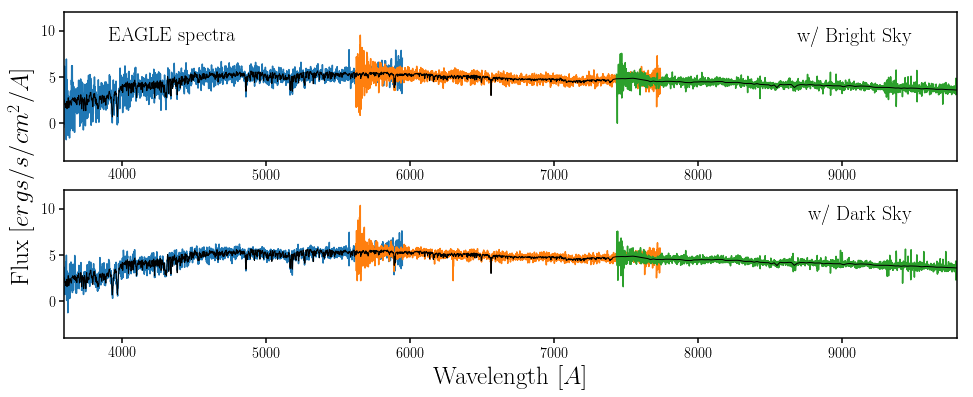

In [22]:
fig = plt.figure(figsize=(16,6))
bkgd = fig.add_subplot(111, frameon=False)
sub = fig.add_subplot(211)
for band in spec_desi_bright.bands: 
    sub.plot(spec_desi_bright.wave[band], spec_desi_bright.flux[band].flatten())
sub.plot(wave_fm, spec_fm, c='k', lw=1)
sub.text(0.05, 0.9, 'EAGLE spectra', ha='left', va='top', transform=sub.transAxes, fontsize=20)
sub.text(0.95, 0.9, 'w/ Bright Sky', ha='right', va='top', transform=sub.transAxes, fontsize=20)
sub.set_xlim([3600., 9800.])
sub.set_ylim([-4., 12.])
sub = fig.add_subplot(212)
for band in spec_desi_dark.bands: 
    sub.plot(spec_desi_dark.wave[band], spec_desi_dark.flux[band].flatten())
sub.plot(wave_fm, spec_fm, c='k', lw=1)
sub.text(0.95, 0.9, 'w/ Dark Sky', ha='right', va='top', transform=sub.transAxes, fontsize=20)
sub.set_xlim([3600., 9800.])
sub.set_ylim([-4., 12.])
bkgd.set_xlabel("Wavelength [$A$]", fontsize=25)
bkgd.set_ylabel("Flux [$ergs/s/cm^2/A$]", fontsize=25)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')